In [3]:
from single_node import threshold_image
from parallel import parallel_thresholding
from tests import plot_benchmarking
from custom_thresholding import simple_image_thresholding

import cv2
from PIL import Image

In [4]:
HEIGHT_WIDTH = (300, 300) 

#### Person's Image Thresholding 

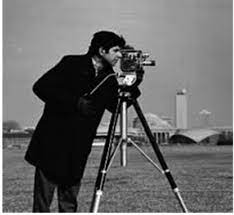

In [5]:
person_img = cv2.imread("C:\\Users\\Admin\\Desktop\\Operating-Systems\\thresholding\\img\\person.jpeg", cv2.IMREAD_GRAYSCALE)
Image.fromarray(person_img)

The optimal threshold is: 79.0
CPU times: total: 0 ns
Wall time: 7.17 ms


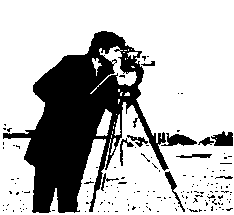

In [6]:
%%time
Image.fromarray(threshold_image(person_img)) #Using cv2

The optimal threshold is: 79
CPU times: total: 15.6 ms
Wall time: 4 ms


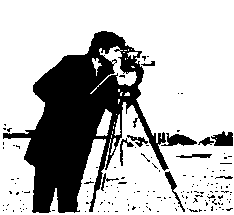

In [7]:
%%time
Image.fromarray(simple_image_thresholding(person_img)) #Using custom algorithm

The optimal threshold is: 79
CPU times: total: 0 ns
Wall time: 2.02 ms


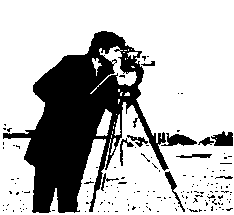

In [8]:
%%time
Image.fromarray(simple_image_thresholding(person_img))

The optimal thresholds for each partition are: [155, 85, 84, 87, 80, 76, 79, 81, 69, 59, 61, 66]
The optimal threshold is: 81
CPU times: total: 46.9 ms
Wall time: 1.1 s


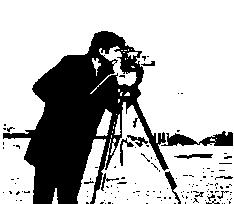

In [9]:
%%time
Image.fromarray(parallel_thresholding(person_img, False)) #Thresholding with mean of all partitions

The optimal thresholds for each partition are: [155, 85, 84, 87, 80, 76, 79, 81, 69, 59, 61, 66]
The optimal threshold is: 81
CPU times: total: 31.2 ms
Wall time: 890 ms


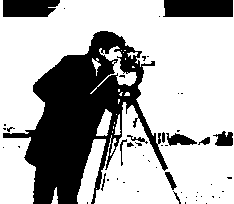

In [10]:
%%time
Image.fromarray(parallel_thresholding(person_img, True)) #Thresholding with optimal threshold of all partitions

#### Dog's Image Thresholding

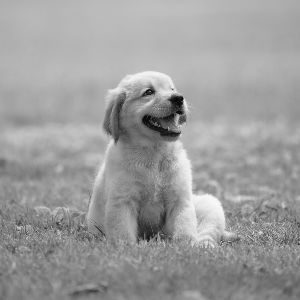

In [11]:
dog_img = cv2.imread("C:\\Users\\Admin\\Desktop\\Operating-Systems\\thresholding\\img\\dog.jpg", cv2.IMREAD_GRAYSCALE)
dog_img = cv2.resize(dog_img, HEIGHT_WIDTH)
Image.fromarray(dog_img)

The optimal threshold is: 151.0
CPU times: total: 0 ns
Wall time: 0 ns


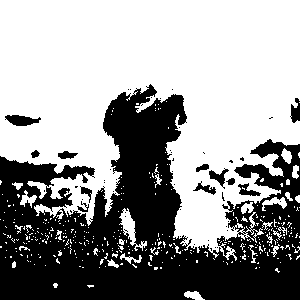

In [12]:
%%time
Image.fromarray(threshold_image(dog_img)) #Using cv2

The optimal threshold is: 151
CPU times: total: 0 ns
Wall time: 0 ns


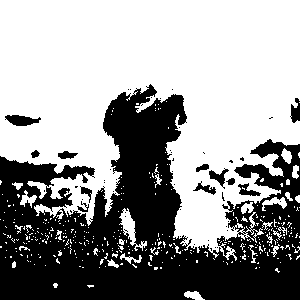

In [17]:
%%time
Image.fromarray(simple_image_thresholding(dog_img)) #Using custom algorithm

The optimal thresholds for each partition are: [179, 176, 208, 126, 119, 134, 158, 172, 171, 146, 136, 123]
The optimal threshold is: 154
CPU times: total: 62.5 ms
Wall time: 856 ms


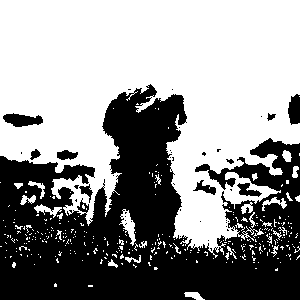

In [13]:
%%time
Image.fromarray(parallel_thresholding(dog_img, False)) #Thresholding with mean of all partitions

The optimal thresholds for each partition are: [179, 176, 208, 126, 119, 134, 158, 172, 171, 146, 136, 123]
The optimal threshold is: 154
CPU times: total: 0 ns
Wall time: 887 ms


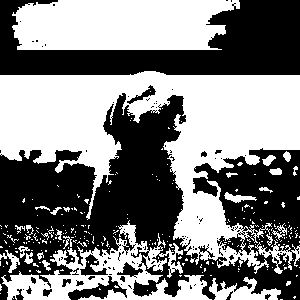

In [14]:
%%time
Image.fromarray(parallel_thresholding(dog_img, True)) #Thresholding with optimal threshold of all partitions

In [18]:
plot_benchmarking(["C:\\Users\\Admin\\Desktop\\Operating-Systems\\thresholding\\img\\person.jpeg",
           "C:\\Users\\Admin\\Desktop\\Operating-Systems\\thresholding\\img\\dog.jpg"])

The optimal threshold is: 79
The optimal thresholds for each partition are: [155, 87, 86, 86, 78, 77, 79, 82, 61, 61, 63, 154]
The optimal threshold is: 89
The optimal thresholds for each partition are: [155, 87, 86, 86, 78, 77, 79, 82, 61, 61, 63, 154]
The optimal threshold is: 89
The optimal threshold is: 79
The optimal thresholds for each partition are: [155, 87, 86, 85, 78, 77, 79, 82, 61, 61, 63, 154]
The optimal threshold is: 89
The optimal thresholds for each partition are: [155, 87, 86, 85, 78, 77, 79, 82, 61, 61, 63, 154]
The optimal threshold is: 89
The optimal threshold is: 79
The optimal thresholds for each partition are: [155, 87, 87, 85, 78, 77, 79, 82, 61, 61, 63, 160]
The optimal threshold is: 89
The optimal thresholds for each partition are: [155, 87, 87, 85, 78, 77, 79, 82, 61, 61, 63, 160]
The optimal threshold is: 89
The optimal threshold is: 79
The optimal thresholds for each partition are: [155, 87, 86, 85, 78, 77, 79, 82, 61, 61, 63, 158]
The optimal threshold is

The optimal threshold is: 79.0
The optimal thresholds for each partition are: [155, 87, 86, 86, 78, 77, 79, 82, 61, 61, 63, 154]
The optimal threshold is: 89
The optimal thresholds for each partition are: [155, 87, 86, 86, 78, 77, 79, 82, 61, 61, 63, 154]
The optimal threshold is: 89
The optimal threshold is: 79.0
The optimal thresholds for each partition are: [155, 87, 86, 85, 78, 77, 79, 82, 61, 61, 63, 154]
The optimal threshold is: 89
The optimal thresholds for each partition are: [155, 87, 86, 85, 78, 77, 79, 82, 61, 61, 63, 154]
The optimal threshold is: 89
The optimal threshold is: 79.0
The optimal thresholds for each partition are: [155, 87, 87, 85, 78, 77, 79, 82, 61, 61, 63, 160]
The optimal threshold is: 89
The optimal thresholds for each partition are: [155, 87, 87, 85, 78, 77, 79, 82, 61, 61, 63, 160]
The optimal threshold is: 89
The optimal threshold is: 79.0
The optimal thresholds for each partition are: [155, 87, 86, 85, 78, 77, 79, 82, 61, 61, 63, 158]
The optimal thre

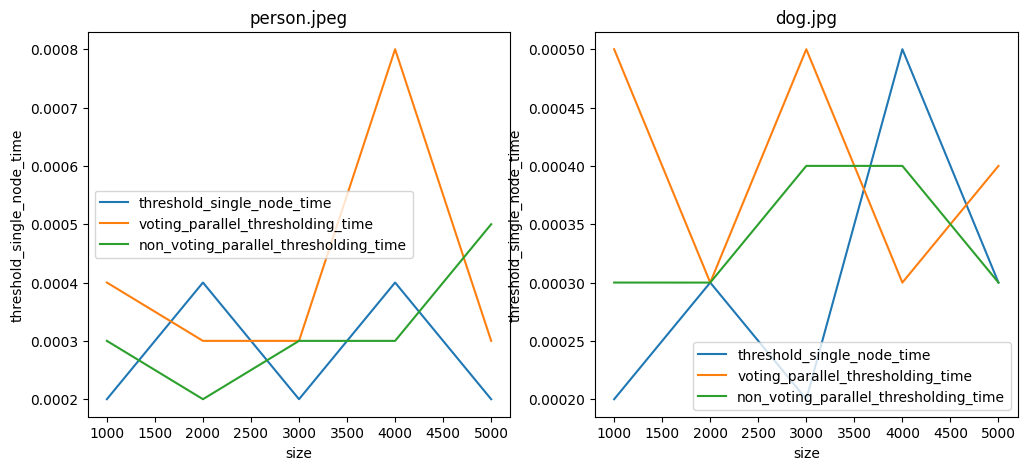

In [16]:
plot_benchmarking(["C:\\Users\\Admin\\Desktop\\Operating-Systems\\thresholding\\img\\person.jpeg",
           "C:\\Users\\Admin\\Desktop\\Operating-Systems\\thresholding\\img\\dog.jpg"],
                  use_cv2=True)